In [1]:
# import the library
import os
import cv2
import matplotlib.pyplot as plt

from zipfile import ZipFile
from urllib.request import urlretrieve

from IPython.display import YouTubeVideo, display, HTML
from base64 import b64encode

%matplotlib inline

In [2]:
def download_and_unzip(url, save_path):
    print(f"Downloading and extracting assests....", end="")

    # Downloading zip file using urllib package.
    urlretrieve(url, save_path)

    try:
        # Extracting zip file using the zipfile package.
        with ZipFile(save_path) as z:
            # Extract ZIP file contents in the same directory.
            z.extractall(os.path.split(save_path)[0])

        print("Done")

    except Exception as e:
        print("\nInvalid file.", e)

In [3]:
URL = r"https://www.dropbox.com/s/p8h7ckeo2dn1jtz/opencv_bootcamp_assets_NB6.zip?dl=1"

asset_zip_path = os.path.join(os.getcwd(), f"opencv_bootcamp_assets_NB6.zip")

# Download if assest ZIP does not exists. 
if not os.path.exists(asset_zip_path):
    download_and_unzip(URL, asset_zip_path) 

In [4]:
source = 'race_car.mp4'  # source = 0 for webcam

cap = cv2.VideoCapture(source)

In [5]:


if not cap.isOpened():
    print("Error opening video stream or file")



In [34]:
ret, frame = cap.read()

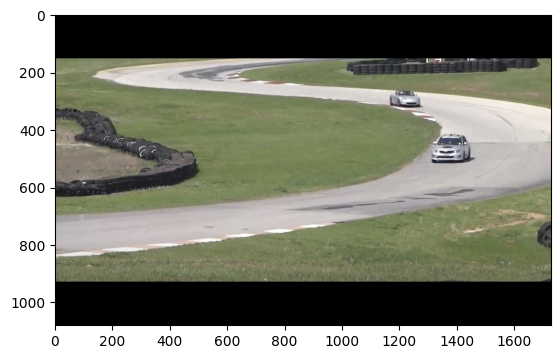

In [35]:
plt.imshow(frame[..., ::-1])

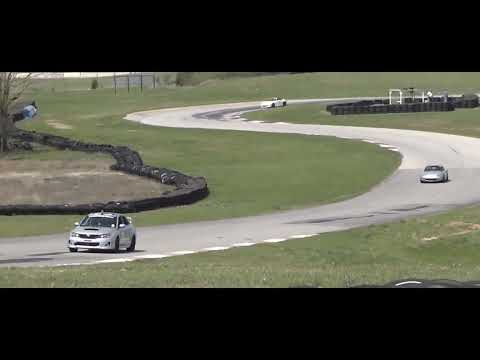

In [36]:
video = YouTubeVideo("RwxVEjv78LQ", width=700, height=438)
display(video)


In [ ]:
# Default resolutions of the frame are obtained.
# Convert the resolutions from float to integer.
frame_width = int(cap.get(3))
frame_height = int(cap.get(4))

# Define the codec and create VideoWriter object.
out_avi = cv2.VideoWriter("race_car_out.avi", cv2.VideoWriter_fourcc("J", "P", "G"), 10, (frame_width, frame_height))

## Read until video is completed
while cap.isOpened():
    # Capture frame-by-frame
    ret, frame = cap.read()

    if ret:
        # Write the frame to the output files
        out_avi.write(frame)
#        out_mp4.write(frame)

    # Break the loop
    else:
        breakout_mp4 = cv2.VideoWriter("race_car_out.mp4", cv2.VideoWriter_fourcc(*"XVID"), 10, (frame_width, frame_height))

In [ ]:
# When everything done, release the VideoCapture and VideoWriter objects
cap.release()
out_avi.release()
#out_mp4.release()

In [ ]:
# Installing ffmpeg


!apt-get -qq install ffmpeg 

In [ ]:
# Change video encoding of mp4 file from XVID to h264 
!ffmpeg -y -i "/content/race_car_out.mp4" -c:v libx264 "race_car_out_x264.mp4"  -hide_banner -loglevel error